In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns  import apriori
from mlxtend.preprocessing  import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

matplotlib.rcParams["font.family"] = "Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"] = False

1. 암데이터셋에 대해 주성분 분석을 수행하시요

In [3]:
bc=load_breast_cancer(as_frame=True)
x = bc.data.values
y = bc.target.values

bc_df = bc['frame']
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

# 2개의 주성분:2차원
pca = PCA( n_components=2)
X_pca = pca.fit_transform( x_scale)
pca_df = pd.DataFrame( X_pca, columns=['pc1','pc2'])
pca_df['target'] = y
pca_explain=pca.explained_variance_ratio_
pca_df

,pc1,pc2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


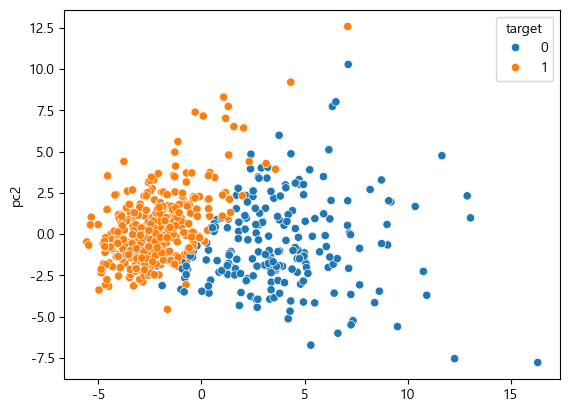

In [4]:
#0이 악성(치명적), 1이 양성(안정)
ax=sb.scatterplot( pca_df, x='pc1', y='pc2', hue='target')
ax.set(xlabel='')
plt.show()

In [5]:
pca_ex_df=pd.DataFrame( pca.components_, columns=bc.feature_names,
              index=['pc1','pc2'])
pca_ex_df.iloc[0].nlargest(5)
pca_ex_df.iloc[1].nlargest(5)

mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
compactness error          0.232716
smoothness error           0.204430
Name: pc2, dtype: float64

In [6]:
pca_explain[0]+pca_explain[1]

np.float64(0.6324320765155944)

1) 총 데이터셋에서 주성분(pc1,pc2)이 반영한 비율은 63%정도
2) 안정된 상태(양성)은 분산이 낮고 악성은 분산이 높음
3) mean concave points/mean concative가 pc1축과 연관이 높음, mean fractal dimension/fractal dimension error가 pc2축과 연관이 높음

2. Groceries_dataset.csv
단( itemDescription : 공백기준 물품은 하나의 물품으로 간주)
1) 지지도가 가장 높은 top 20을 구하시요
2) 지지도, 신뢰도, 향상도를 구하시요(신뢰도 0.5이상)

In [7]:
df=pd.read_csv('../data/Groceries_dataset.csv')

In [8]:
gr={}
for i in range(len(df)):
    key=str(df.iloc[i,0])+"_"+str(df.iloc[i,1])
    item=df.iloc[i,2]
    if key not in gr:
        gr[key] = [item]
    else:
        gr[key].append(item)


In [9]:
ar=list(gr.values())
ar

[['tropical fruit', 'rolls/buns', 'candy'],
 ['whole milk', 'tropical fruit', 'chocolate'],
 ['pip fruit', 'other vegetables', 'flour'],
 ['other vegetables', 'onions', 'shopping bags'],
 ['whole milk', 'other vegetables', 'white bread'],
 ['rolls/buns', 'citrus fruit', 'fruit/vegetable juice'],
 ['other vegetables', 'bottled water', 'shopping bags'],
 ['pot plants', 'citrus fruit', 'whipped/sour cream'],
 ['whole milk', 'specialty bar', 'newspapers'],
 ['tropical fruit', 'citrus fruit', 'soda'],
 ['citrus fruit', 'rolls/buns', 'pastry'],
 ['beef', 'bottled beer', 'specialty chocolate', 'yogurt', 'whole milk'],
 ['frankfurter', 'soda', 'canned beer', 'white bread', 'brown bread'],
 ['chicken', 'tropical fruit', 'waffles', 'whipped/sour cream', 'brown bread'],
 ['butter', 'other vegetables', 'soda', 'yogurt', 'UHT-milk'],
 ['fruit/vegetable juice',
  'hamburger meat',
  'soft cheese',
  'specialty chocolate',
  'bottled water'],
 ['packaged fruit/vegetables',
  'fish',
  'frozen meals',

In [10]:
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()
transactions 

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [11]:
te = TransactionEncoder()
te_result = te.fit_transform(transactions)
df = pd.DataFrame( te_result, columns = te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
itemset = apriori( df,min_support=0.01, use_colnames=True)

itemset.nlargest(20,'support',keep='all')

,support,itemsets
62,0.157923,(whole milk)
40,0.122101,(other vegetables)
46,0.110005,(rolls/buns)
52,0.097106,(soda)
63,0.085879,(yogurt)
47,0.069572,(root vegetables)
57,0.067767,(tropical fruit)
5,0.060683,(bottled water)
49,0.060349,(sausage)
15,0.053131,(citrus fruit)


In [13]:
association_rules(
    itemset,  
    min_threshold= 0.1
).sort_values(
    by='support', 
    ascending=False
)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(other vegetables),(whole milk),0.014837,0.121511,0.769430
1,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
2,(soda),(whole milk),0.011629,0.119752,0.758296
3,(yogurt),(whole milk),0.011161,0.129961,0.822940
